In [1]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm
import numpy
import pandas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier


import matplotlib.pyplot as plt
#from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error



from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from keras.constraints import maxnorm
#from keras.optimizers import

In [2]:
df = pd.read_csv(r'C:\Users\reemn\Downloads\adult.csv\adult.csv')

In [3]:
# salary dataset info to find columns and count of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.rename(columns={"capital.gain": "capital gain", 'capital.loss': 'capital loss', 'native.country': 'country','hours.per.week': 'hours per week','marital.status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [5]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week       0
country            583
income               0
dtype: int64

In [6]:
# code will replace the special character to nan and then drop the columns 

df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
df['country'] = df['country'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [8]:
#dropping based on uniquness of data from the dataset 
df.drop(['education.num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [40]:
df.columns

Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'sex', 'income'],
      dtype='object')

In [9]:
#mapping the data into numerical data using map function
df = df.dropna()
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [10]:
#gender
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [11]:
#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [12]:
#marital
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [13]:
#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [14]:
#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [15]:
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

In [16]:
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

<AxesSubplot:xlabel='sex'>

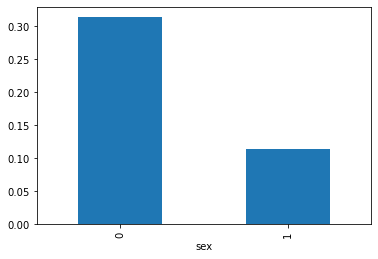

In [17]:
df.groupby('sex').income.mean().plot(kind='bar')

In [19]:
#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['sex'],df['marital'],df['workclass']], columns = ['relationship','education','race','occupation','sex','marital','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df.income)

In [20]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20208 entries, 28067 to 23654
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   relationship  20208 non-null  int32
 1   education     20208 non-null  int32
 2   race          20208 non-null  int32
 3   occupation    20208 non-null  int32
 4   sex           20208 non-null  int32
 5   marital       20208 non-null  int32
 6   workclass     20208 non-null  int32
dtypes: int32(7)
memory usage: 710.4 KB


In [22]:
print(df)

       workclass  education  marital  occupation  relationship  race  sex  \
1              5          3        1           7             0     3    1   
3              5          6        4           6             3     3    1   
4              5          0        3           5             5     3    1   
5              5          3        4          13             3     3    1   
6              5         13        3           3             3     3    0   
...          ...        ...      ...         ...           ...   ...  ...   
32556          5          0        5          14             0     3    0   
32557          5          9        2           2             1     3    1   
32558          5          3        2           6             4     3    0   
32559          5          3        1           3             3     3    1   
32560          5          3        5           3             5     3    0   

       income  
1           0  
3           0  
4           0  
5          

In [23]:
#Train our model with the training data
reg.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = reg.predict(x_test)

C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
#feeding the predict function with our test values in the format 
[['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

array([1])

In [25]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.750853928069118


In [26]:
num_instances = len(df_x)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('L_SVM', LinearSVC()))
models.append(('SGDC', SGDClassifier()))

# Evaluations
results = []
names = []

for name, model in models:
    # Fit the model
    model.fit(x_train, y_train)
    
    predictions = model.predict(x_test)
    
    # Evaluate the model
    score = accuracy_score(y_test, predictions)
    mse = mean_squared_error(predictions, y_test)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mse)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mse)
    print(msg)

C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LR: 0.750854 (0.249146)
LDA: 0.749849 (0.250151)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN: 0.809021 (0.190979)
CART: 0.809725 (0.190275)
NB: 0.711774 (0.288226)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVM: 0.774262 (0.225738)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


L_SVM: 0.754772 (0.245228)
SGDC: 0.755676 (0.244324)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
